In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from plotnine import *
import itertools
#from nilearn import image, plotting, datasets
#import nibabel as nib
import pdb
import os

In [2]:
study = "spaceloc"
subj_list = list(range(1001, 1013))
study_dir = f"/lab_data/behrmannlab/vlad/{study}"
fig_dir = f'/user_data/vayzenbe/GitHub_Repos/docnet/figures'
results_dir = f'/user_data/vayzenbe/GitHub_Repos/docnet/results'
rois = ['PPC_spaceloc', 'APC_spaceloc', 'LO_toolloc', 'PFS_toolloc']
roi_names = ['PPC', 'APC','LO', 'PFS']

exps = ['spaceloc', 'depthloc', 'distloc', 'toolloc', 'toolloc']
exp_conds = ['space', 'depth', 'dist', 'tool', 'object']
copes = [1, 1, 1, 1, 5]
suf = '_roi'

conds = ['space', 'feature', '3D', '2D', 'tool', 'non_tool', 'distance', 'luminance']
dorsal_conds = ['space', '3D', 'tool', 'distance']
cond_names = ['Space', 'Feature' ,'3D Shape', '2D Shape', 'Tools', 'Non-tools', 'Distance', 'Brightness']


num_vox = 100

#template = datasets.load_mni152_template()

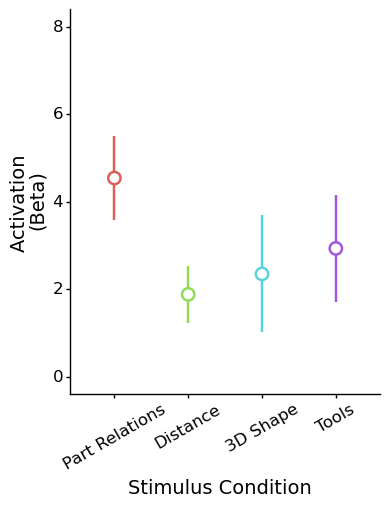

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/spaceloc/selectivity/lPPC_spaceloc_selectivity_point.png


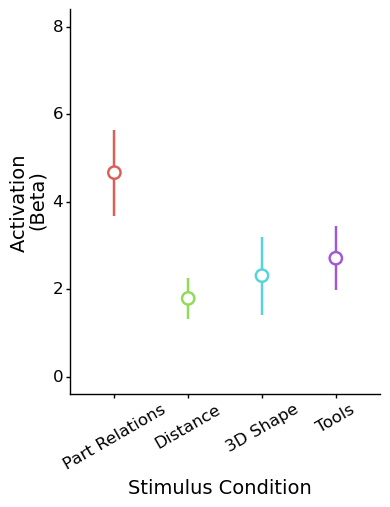

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/spaceloc/selectivity/lAPC_spaceloc_selectivity_point.png


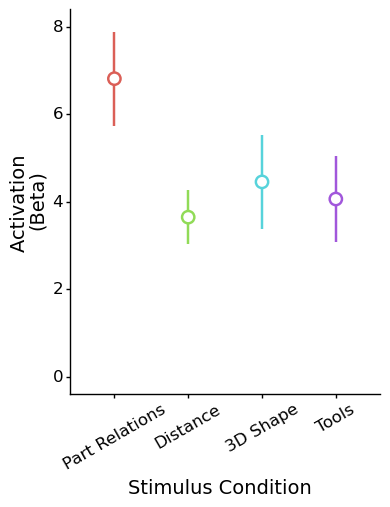

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/spaceloc/selectivity/rPPC_spaceloc_selectivity_point.png


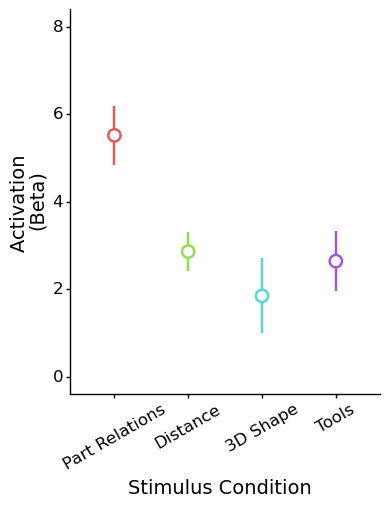

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/spaceloc/selectivity/rAPC_spaceloc_selectivity_point.png


In [11]:
"""
plot spaceloc selectivity
"""
rois =  ['lPPC_spaceloc', 'lAPC_spaceloc','rPPC_spaceloc', 'rAPC_spaceloc']
roi_names = ['lpIPS', 'laIPS','rpIPS', 'raIPS']
dorsal_conds = ['space', 'distance', '3D', 'tool']
cond_names = ['Part Relations', 'Distance' ,'3D Shape','Tools']

for rr in rois:
    #rr = 'rPPC_spaceloc'
    summary_df = pd.DataFrame(columns = ["Condition", "Beta", "SE"])
    summary_df['Condition'] = cond_names
    df = pd.read_csv(f"{results_dir}/{rr}_subj_summary_activation.csv")
    df = df[dorsal_conds]
    df.columns = cond_names
    summary_df['Beta'] = df.mean().to_list()
    summary_df['SE'] = df.sem().to_list()
    #cond_mean = df.mean()
    #cond_se = df.sem()
    df['sub'] = list(range(0,len(df)))
    df_melt = pd.melt(df,id_vars='sub',var_name = 'Condition',value_name ='Beta')

    summary_df['Condition'] = pd.Categorical(summary_df['Condition'], categories = cond_names, ordered = False)

    plot = ggplot(summary_df, aes(x='Condition', y='Beta',color = 'Condition')) + geom_linerange(aes(x='Condition',  ymax = f'Beta + SE', ymin = f'Beta - SE'), size = 1) + \
        geom_point(shape = 'o', size = 4, fill = 'White', stroke = 1) + ylim(0, 8) + \
        theme_classic() + xlab('Stimulus Condition') + ylab('Activation \n(Beta)') + \
            theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                            axis_line=element_line(), 
                                                                            panel_border=element_blank(),
                                                                            legend_position = "none",
                                                                            figure_size = (4, 5))

    print(plot)
    plot.save(f'{fig_dir}/spaceloc/selectivity/{rr}_selectivity_point.png', width=4, height=5, dpi = 300)





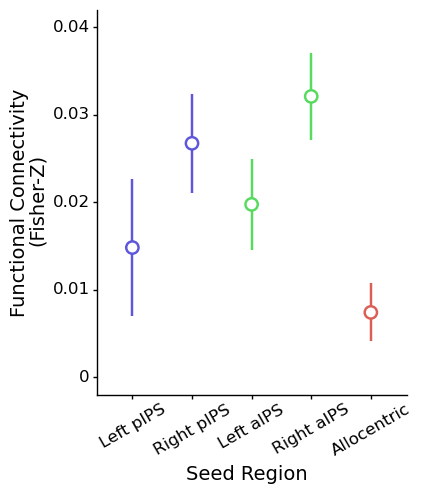

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/spaceloc/PPI/lLO_toolloc_ppi_point.png


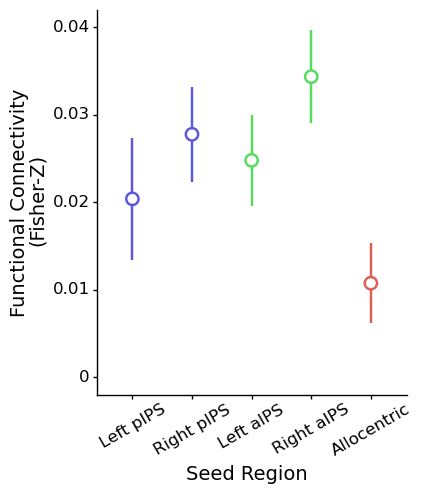

/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 5 in image.
/home/vayzenbe/.conda/envs/ml/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /user_data/vayzenbe/GitHub_Repos/docnet/figures/spaceloc/PPI/rLO_toolloc_ppi_point.png


In [98]:
"""
plot PPI
"""
dorsal_rois =  ['lPPC_spaceloc', 'rPPC_spaceloc','lAPC_spaceloc', 'rAPC_spaceloc', 'lAPC_distloc']
ventral_rois = ['lLO_toolloc', 'rLO_toolloc']
roi_names = ['Left pIPS', 'Right pIPS', 'Left aIPS','Right aIPS', 'Allocentric']
roi_pos = ['posterior', 'posterior', 'anterior', 'anterior', 'Distance']

for rr in ventral_rois:

    summary_df = pd.DataFrame(columns = ["ROI",'LOC' "FC", "SE"])
    summary_df['ROI'] = roi_names
    summary_df['LOC'] = roi_pos

    df = pd.read_csv(f"{results_dir}/{rr}_fc.csv")
    df = df[dorsal_rois]
    #df.columns = cond_names
    summary_df['FC'] = df.mean().to_list()
    summary_df['SE'] = df.sem().to_list()

    summary_df['ROI'] = pd.Categorical(summary_df['ROI'], categories = roi_names, ordered = False)

    plot = ggplot(summary_df, aes(x='ROI', y='FC',color = 'LOC')) + geom_linerange(aes(x='ROI',  ymax = f'FC + SE', ymin = f'FC - SE'), size = 1) + \
            geom_point(shape = 'o', size = 4, fill = 'White', stroke = 1) + ylim(0, .04) + \
            theme_classic() + xlab('Seed Region') + ylab('Functional Connectivity \n(Fisher-Z)') + \
                theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                                axis_line=element_line(), 
                                                                                panel_border=element_blank(),
                                                                                legend_position = "none",
                                                                                figure_size = (4, 5))

    print(plot)
    plot.save(f'{fig_dir}/spaceloc/PPI/{rr}_ppi_point.png', width=4, height=5, dpi = 300)

In [ ]:
# create a figure with multiple axes to plot each anatomical image
def plot_glass_brain(subs, exp):
    fig, axes = plt.subplots(nrows=len(all_subs), ncols=1, figsize=(9, 25))


    # axes is a 2 dimensional numpy array
    for axn, ax in enumerate(axes.flatten()):
        display = plotting.plot_glass_brain(all_subs[axn], axes=ax, threshold = 3.1, draw_cross = False, colorbar = True)

        ax.title.set_text(f'Subject {axn + 1}')

    plt.show()
    display.savefig(f'{fig_dir}/{exp}_glassbrain.png')   
    plt.pause(0.0001)

    # save the output figure with all the anatomical images
    #fig.savefig("my_test_img.png")

In [ ]:
def plot_bar(df, ylabel, roi):

    y_min = 0
    y_max = 12

    plot = ggplot(df, aes(x='Condition', y=ylabel, color = 'Condition', fill = 'Condition')) + geom_col(color="black", position =position_dodge(width =1)) + \
    geom_linerange(aes(x='Condition',  ymax = f'{ylabel} + se', ymin = f'{ylabel} - se'), color = 'black', position = position_dodge(width =1))  + \
            theme_classic() + xlab('Conditions') + ylab('Activation') + theme(text = element_text(color ='black'), 
                                                                          axis_line=element_line(), 
                                                                          panel_border=element_blank(),
                                                                          figure_size = (4, 5),subplots_adjust={'wspace': 0.15},strip_background = element_blank())
    
    print(plot)
    plot.save(f'{fig_dir}/{roi}_{ylabel}_bar.png', width=4, height=5, dpi = 300)
    
    

In [ ]:
def plot_bar_2rois(df, ylabel, roi):

    y_min = np.min(df[ylabel])
    y_max = np.max(df[ylabel]) +2

    plot = ggplot(df, aes(x='Condition', y=ylabel, color = 'Condition', fill = 'Condition')) + geom_col(color="black", position =position_dodge(width =1)) +  facet_wrap('~ROI', scales='free') + \
    geom_linerange(aes(x='Condition',  ymax = f'{ylabel} + se', ymin = f'{ylabel} - se'), color = 'black', position = position_dodge(width =1))  + \
            theme_classic() + xlab('Conditions') + ylab(ylabel) + theme(text = element_text(color ='black'), 
                                                                          axis_line=element_line(), 
                                                                          panel_border=element_blank(),
                                                                          figure_size = (15, 5),subplots_adjust={'wspace': 0.15},strip_background = element_blank())
    
    print(plot)
    plot.save(f'{fig_dir}/{roi}_{ylabel}_bar.png', width=15, height=5, dpi = 300)
    
    

In [ ]:
def create_vsf(df, ylabel, roi):
    y_min = np.min(df[ylabel])
    y_max = np.max(df[ylabel])
    
    plot = ggplot(df, aes(x='Voxels', y=ylabel, color = 'Condition', fill = 'Condition')) + geom_line() + \
        theme_classic() + xlab('Voxels') + ylab(ylabel) + ylim(y_min,y_max) + theme(text = element_text(color ='black'), 
                                                                      axis_line=element_line(), 
                                                                      panel_border=element_blank(),
                                                                      figure_size = (15, 5),subplots_adjust={'wspace': 0.15},strip_background = element_blank())  + facet_wrap('~ROI', scales='free')
    
    print(plot)
    
    
    plot.save(f'{fig_dir}/{roi}_{ylabel}_vsf.png', width=15, height=5, dpi = 300)


In [ ]:
"""
Plot glass brain 
"""
for exn, exp in enumerate(exps):
    all_subs = []
    for ss in subj_list:
        stats_dir = f'{study_dir}/sub-{study}{ss}/ses-01/derivatives/fsl/{exp}/HighLevel{suf}.gfeat'
        curr_sub = image.load_img(f'{stats_dir}/cope{copes[exn]}.feat/stats/zstat1.nii.gz') # load image
        
        affine = curr_sub.affine #extract original affine
        curr_sub = image.get_data(curr_sub) #convert to numpy
        
        
        curr_sub[curr_sub[:,:,:] <=0] = 0 #zero out anything negative
        #cluster_mask = image.get_data(image.load_img(f'{stats_dir}/cope{copes[exn]}.feat/stats/zstat1.nii.gz')) #load cluster corrected mask as numpy array
        
        #curr_sub = curr_sub * cluster_mask #mask with cluster-correction
        curr_sub = nib.Nifti1Image(curr_sub, affine) #convert back to volume
        curr_sub = image.resample_to_img(curr_sub, template) #resample to MNI
        all_subs.append(curr_sub)
    
    print(exp)    
    plot_glass_brain(all_subs, exp_conds[exn])
    
    
        

In [ ]:
roi_conds = []
for ex in exps:
    for rr in roi_names:
        for lr in ['l', 'r']:
            roi_conds.append(f'{lr}{rr}_{ex}.nii.gz')

In [ ]:
len(roi_conds)

In [ ]:
"""
Calcualte size and quantity of each ROI for each sub
"""
#Create a list of all roi conds
roi_conds = []
for ex in exps:
    for rr in roi_names:
        for lr in ['l', 'r']:
            roi_conds.append(f'{lr}{rr}_{ex}')

roi_summary = pd.DataFrame(columns = ['subj'] + roi_conds)
for ss in subj_list:
    roi_dir = f'{study_dir}/sub-{study}{ss}/ses-01/derivatives/rois'
    subj_data = [ss]
    for rr in roi_conds:
        print(f'{roi_dir}/{rr}.nii.gz')
        if os.path.exists(f'{roi_dir}/{rr}.nii.gz'):
            roi_nifti = image.get_data(image.load_img(f'{roi_dir}/{rr}.nii.gz'))
            roi_size = np.sum(roi_nifti == 1)

            subj_data.append(roi_size)


        else:
            subj_data.append(0)

    
    subj_data = pd.Series(subj_data, index = roi_summary.columns)
    
    roi_summary = roi_summary.append(subj_data, ignore_index = True)

In [ ]:
roi_summary[['lPPC_depthloc', 'rPPC_depthloc', 'lAPC_depthloc', 'rAPC_depthloc']]

In [ ]:
"""Load pre computed flat maps for display"""

exp = ['depthloc', 'distloc', 'toolloc']
for ex in exp:
    print('spaceloc', ex)
    plt.figure(figsize=(12, 6), dpi=80)
    im = plt.imread(f'spaceloc_{ex}_conjunction.png')
    plt.axis('off')
    plt.imshow(im)
    plt.pause(0.0001)

In [ ]:
conds = ['space', '3D', 'tool', 'distance']

roi_conds = []
for lr in ['l', 'r']:
    for rr in rois:
        for cc in conds:
            roi_conds.append(f'{lr}{rr}_{cc}')
            
            

"""
Average Activation for each ROI
across subs
"""
data_type ='activations'


summary_df = pd.DataFrame(columns = ["sub"] + roi_conds)

for sn, ss in enumerate(subj_list):

    sub_dir = f'{study_dir}/sub-spaceloc{ss}/ses-01/derivatives'
    results_dir = f'{sub_dir}/results/beta_summary'
    roi_data = [ss]
    for lr in ['l', 'r']:
        for rr in rois:            
            if os.path.exists(f'{results_dir}/spaceloc{ss}_{lr}{rr}_{data_type}.csv'):
                
                curr_sub = pd.read_csv(f'{results_dir}/spaceloc{ss}_{lr}{rr}_{data_type}.csv')
                curr_sub = curr_sub[conds]
                curr_sub = curr_sub.iloc[0:num_vox,:]
                roi_data = roi_data + curr_sub.mean(axis =0).to_list()
                
                #summary_df = summary_df.append(curr_sub.mean(axis =0), ignore_index = True)

            else:
                nan_list = np.empty((len(conds)))
                nan_list[:] = np.nan
                roi_data = roi_data + nan_list.tolist()

    summary_df = summary_df.append(pd.Series(roi_data, index = summary_df.columns),ignore_index = True)

    summary_df.to_csv(f'/user_data/vayzenbe/GitHub_Repos/docnet/results/Exp1_allroi_summary_activation.csv', index = False)




In [ ]:
"""
Average Activation for each ROI
"""
data_type = "activations"
results_dir = f'/home/vayzenbe/GitHub_Repos/docnet/results/'
for rn, rr in enumerate(rois):
    for lr in ['l', 'r']:
        summary_df =pd.DataFrame(columns = ['Condition', data_type.capitalize(), 'se'])
        temp_summary =pd.DataFrame(columns = ['Condition', data_type.capitalize(), 'se'])

        df = pd.read_csv(f'{results_dir}/{lr}{rr}_subj_summary_activation.csv')
        df = df[dorsal_conds]
        df_mean = df.mean(axis = 0)
        df_se = df.sem()

        summary_df['Condition'] = df_mean.index
        summary_df[data_type.capitalize()] = df_mean.to_list()
        summary_df[f'se']  = df_se.to_list()
        summary_df['ROI'] = f'l{roi_names[rn]}'


        summary_df['Condition'] = pd.Categorical(summary_df['Condition'], categories = dorsal_conds, ordered = False)

        plot_bar(summary_df, data_type.capitalize(), f'{lr}{rr}')

In [ ]:
"""
Average Activation for each ROI
"""
data_type = "activations"

for rn, rr in enumerate(rois):

    summary_df =pd.DataFrame(columns = ['Condition', data_type.capitalize(), 'se'])
    temp_summary =pd.DataFrame(columns = ['Condition', data_type.capitalize(), 'se'])

    # load ROI 1
    df = pd.read_csv(f'{results_dir}/l{rr}_mean_{data_type}.csv')
    df = df.iloc[0:num_vox,:].mean()

    summary_df['Condition'] = df.index
    summary_df[data_type.capitalize()] = df.to_list()

    df_se = pd.read_csv(f'{results_dir}/l{rr}_se_{data_type}.csv')
    df_se = df_se.iloc[0:num_vox,:].mean()

    summary_df[f'se']  = df_se.to_list()
    summary_df['ROI'] = f'l{roi_names[rn]}'

    #load ROI 2
    df = pd.read_csv(f'{results_dir}/r{rr}_mean_{data_type}.csv')
    df = df.iloc[0:num_vox,:].mean()

    temp_summary['Condition'] = df.index
    temp_summary[data_type.capitalize()] = df.to_list()

    df_se = pd.read_csv(f'{results_dir}/r{rr}_se_{data_type}.csv')
    df_se = df_se.iloc[0:num_vox,:].mean()

    temp_summary['se']  = df_se.to_list()
    temp_summary['ROI'] = f'r{roi_names[rn]}'


    #combine
    summary_df = summary_df.append(temp_summary)

    summary_df['Condition'] = pd.Categorical(summary_df['Condition'], categories = conds, ordered = False)
    
    plot_bar(summary_df, data_type.capitalize(), rr)


In [ ]:
summary_df.mean()


In [ ]:
summary_df = pd.DataFrame(columns = conds)
lr='r'
rr='PPC'
for sn, ss in enumerate(subj_list):
    sub_dir = f'{study_dir}/sub-spaceloc{ss}/ses-01/derivatives'
    results_dir = f'{sub_dir}/results/beta_summary'
    curr_sub = pd.read_csv(f'{results_dir}/spaceloc{ss}_{lr}{rr}_spaceloc_{data_type}.csv')
    curr_sub = curr_sub[conds]
    curr_sub = curr_sub.iloc[0:num_vox,:]

    summary_df = summary_df.append(curr_sub.mean(axis =0), ignore_index = True)

In [ ]:
print(summary_df.mean(axis=0), summary_df.sem(axis=0))

In [ ]:
"""
Voxel-wise activation for each ROI

"""

data_type = "activations"

for rn, rr in enumerate(rois):
    #load left roi
    df = pd.read_csv(f'{results_dir}/l{rr}_mean_{data_type}.csv')
    df['Voxels'] = df.index +1
    df = df.iloc[0:num_vox,:]
    df_melt = pd.melt(df, id_vars='Voxels', var_name = 'Condition', value_name = data_type.capitalize())
    df_melt['ROI'] = f'l{roi_names[rn]}'    
    #load right roi 
    df2 = pd.read_csv(f'{results_dir}/r{rr}_mean_{data_type}.csv')
    df2['Voxels'] = df2.index +1
    df2 = df2.iloc[0:num_vox,:]
    df_melt2 = pd.melt(df2, id_vars='Voxels', var_name = 'Condition', value_name = data_type.capitalize())
    df_melt2['ROI'] = f'r{roi_names[rn]}'
    
    #combine left and right rois
    df_melt = df_melt.append(df_melt2)
    
    df_melt['Condition'] = pd.Categorical(df_melt['Condition'], categories = conds, ordered = False)


    create_vsf(df_melt, data_type.capitalize(), rr)

In [ ]:
"""
Average MVPA for each ROI
"""
data_type = "correlations"

for rn, rr in enumerate(rois):

    summary_df =pd.DataFrame(columns = ['Condition', data_type.capitalize(), 'se'])
    temp_summary =pd.DataFrame(columns = ['Condition', data_type.capitalize(), 'se'])

    # load ROI 1
    df = pd.read_csv(f'{results_dir}/l{rr}_mean_{data_type}.csv')
    df = df.iloc[0:num_vox,:].mean()

    summary_df['Condition'] = df.index
    summary_df[data_type.capitalize()] = df.to_list()

    df_se = pd.read_csv(f'{results_dir}/l{rr}_se_{data_type}.csv')
    df_se = df_se.iloc[0:num_vox,:].mean()

    summary_df[f'se']  = df_se.to_list()
    summary_df['ROI'] = f'l{roi_names[rn]}'

    #load ROI 2
    df = pd.read_csv(f'{results_dir}/r{rr}_mean_{data_type}.csv')
    df = df.iloc[0:num_vox,:].mean()

    temp_summary['Condition'] = df.index
    temp_summary[data_type.capitalize()] = df.to_list()

    df_se = pd.read_csv(f'{results_dir}/r{rr}_se_{data_type}.csv')
    df_se = df_se.iloc[0:num_vox,:].mean()

    temp_summary['se']  = df_se.to_list()
    temp_summary['ROI'] = f'r{roi_names[rn]}'


    #combine
    summary_df = summary_df.append(temp_summary)

    summary_df['Condition'] = pd.Categorical(summary_df['Condition'], categories = conds, ordered = False)
    
    plot_bar(summary_df, data_type.capitalize(), rr)


In [ ]:
"""
Voxel-wise MVPA for each ROI

"""

data_type = "correlations"

for rn, rr in enumerate(rois):
    #load left roi
    df = pd.read_csv(f'{results_dir}/l{rr}_mean_{data_type}.csv')
    df['Voxels'] = df.index +1
    df = df.iloc[0:num_vox,:]
    df_melt = pd.melt(df, id_vars='Voxels', var_name = 'Condition', value_name = data_type.capitalize())
    df_melt['ROI'] = f'l{roi_names[rn]}'    
    #load right roi 
    df2 = pd.read_csv(f'{results_dir}/r{rr}_mean_{data_type}.csv')
    df2['Voxels'] = df2.index +1
    df2 = df2.iloc[0:num_vox,:]
    df_melt2 = pd.melt(df2, id_vars='Voxels', var_name = 'Condition', value_name = data_type.capitalize())
    df_melt2['ROI'] = f'r{roi_names[rn]}'
    
    #combine left and right rois
    df_melt = df_melt.append(df_melt2)
    
    df_melt['Condition'] = pd.Categorical(df_melt['Condition'], categories = conds, ordered = False)


    create_vsf(df_melt, data_type.capitalize(),rr)